In [2]:
# Análisis del dataset  sobre síntomas de enfermedades por pacientes
# https://www.kaggle.com/itachi9604/disease-symptom-description-dataset

import pandas as pd
data = pd.read_csv('dataset.csv', sep=',')

In [3]:
data

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [4]:
# Mostrar las columnas del dataset
data.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

# Variables a considerar
- Fever
- Difficulty breathing
- Age
- Gender
- Cholesterol Level
- Outcome Variable
- Blood Pressure

# Variable target
- Disease (posible enfermedad)

In [5]:
# Crear un nuevo dataset con algunas columnas del original
data2 = data[['Disease', 'Fever', 'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']]
data2

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,No,25,Female,Normal,Normal,Negative
2,Eczema,No,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,90,Female,High,High,Positive


In [6]:
# Determinar la cantidad de registros con valores nulos
data2.isnull().sum()

Disease                 0
Fever                   0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [7]:
# Determinar la cantidad de registros con valores duplicados
data2.duplicated().sum()

50

In [8]:
# Determinar la cantidad de registros con valores duplicados por fila
data2.duplicated(subset=['Disease', 'Fever', 'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']).sum()

50

In [9]:
# Eliminar registros con valores duplicados
data3 = data2.drop_duplicates()
data3

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,No,25,Female,Normal,Normal,Negative
2,Eczema,No,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...
341,Tonsillitis,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,85,Male,High,High,Positive


# Transformar las variables
- Fever: 0 para No y 1 para Yes
- Difficulty Breathing: 0 para No y 1 para Yes
- Gender: 0 para Male y 1 para Female
- Blood Pressure: 0 para Low, 1 para Normal y 2 para High
- Cholesterol Level: 0 para Low, 1 para Normal y 2 para High
- Outcome Variable: 0 para Negative y 1 para Positive

In [10]:
data4 = data3
data4

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,No,25,Female,Normal,Normal,Negative
2,Eczema,No,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...
341,Tonsillitis,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,85,Male,High,High,Positive


In [11]:
# Fever
# Convertir la columna Fever a valores numéricos: 0 para 'No' y 1 para 'Yes'
data4.loc[:, 'Fever'] = data3['Fever'].map({'No': 0, 'Yes': 1})
data4

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,Yes,19,Female,Low,Normal,Positive
1,Common Cold,0,No,25,Female,Normal,Normal,Negative
2,Eczema,0,No,25,Female,Normal,Normal,Negative
3,Asthma,1,Yes,25,Male,Normal,Normal,Positive
5,Eczema,1,No,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...
341,Tonsillitis,1,No,70,Female,High,High,Positive
342,Williams Syndrome,0,No,70,Female,Normal,Normal,Positive
343,Stroke,1,No,80,Female,High,High,Positive
345,Stroke,1,No,85,Male,High,High,Positive


In [12]:
# Difficult Breathing
# Convertir la columna Difficulty Breathing a valores numéricos: 0 para 'No' y 1 para 'Yes'
data4.loc[:, 'Difficulty Breathing'] = data3['Difficulty Breathing'].map({'No': 0, 'Yes': 1})
data4

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,1,19,Female,Low,Normal,Positive
1,Common Cold,0,0,25,Female,Normal,Normal,Negative
2,Eczema,0,0,25,Female,Normal,Normal,Negative
3,Asthma,1,1,25,Male,Normal,Normal,Positive
5,Eczema,1,0,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...
341,Tonsillitis,1,0,70,Female,High,High,Positive
342,Williams Syndrome,0,0,70,Female,Normal,Normal,Positive
343,Stroke,1,0,80,Female,High,High,Positive
345,Stroke,1,0,85,Male,High,High,Positive


In [13]:
# Gender
# Convertir la columna Gender a valores numéricos: 0 para 'Male' y 1 para 'Female'
data4.loc[:, 'Gender'] = data3['Gender'].map({'Male': 0, 'Female': 1})
data4

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,1,19,1,Low,Normal,Positive
1,Common Cold,0,0,25,1,Normal,Normal,Negative
2,Eczema,0,0,25,1,Normal,Normal,Negative
3,Asthma,1,1,25,0,Normal,Normal,Positive
5,Eczema,1,0,25,1,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...
341,Tonsillitis,1,0,70,1,High,High,Positive
342,Williams Syndrome,0,0,70,1,Normal,Normal,Positive
343,Stroke,1,0,80,1,High,High,Positive
345,Stroke,1,0,85,0,High,High,Positive


In [14]:
# Blood Pressure
#Convertir la columna Blood Pressure a valores numericos: 0 para "Low", 1 para "Normal" y 2 para "High"
data4.loc[:, 'Blood Pressure'] = data3['Blood Pressure'].map({'Low': 0, 'Normal':1, 'High': 2})
data4

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,1,19,1,0,Normal,Positive
1,Common Cold,0,0,25,1,1,Normal,Negative
2,Eczema,0,0,25,1,1,Normal,Negative
3,Asthma,1,1,25,0,1,Normal,Positive
5,Eczema,1,0,25,1,1,Normal,Positive
...,...,...,...,...,...,...,...,...
341,Tonsillitis,1,0,70,1,2,High,Positive
342,Williams Syndrome,0,0,70,1,1,Normal,Positive
343,Stroke,1,0,80,1,2,High,Positive
345,Stroke,1,0,85,0,2,High,Positive


In [15]:
# Cholesterol Level
#Convertir la columna Cholesterol Level a valores numericos: 0 para "Low", 1 para "Normal" y 2 para "High"
data4.loc[:, 'Cholesterol Level']= data3['Cholesterol Level'].map({'Low':0, 'Normal':1, 'High':2})
data4

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,1,19,1,0,1,Positive
1,Common Cold,0,0,25,1,1,1,Negative
2,Eczema,0,0,25,1,1,1,Negative
3,Asthma,1,1,25,0,1,1,Positive
5,Eczema,1,0,25,1,1,1,Positive
...,...,...,...,...,...,...,...,...
341,Tonsillitis,1,0,70,1,2,2,Positive
342,Williams Syndrome,0,0,70,1,1,1,Positive
343,Stroke,1,0,80,1,2,2,Positive
345,Stroke,1,0,85,0,2,2,Positive


In [16]:
#Outcome Variable
# Convertir la columna Outcome Variable a valores numéricos: 0 para 'Negative' y 1 para 'Positive'
data4.loc[:, 'Outcome Variable'] = data3['Outcome Variable'].map({'Negative': 0, 'Positive': 1})
data4

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,1,19,1,0,1,1
1,Common Cold,0,0,25,1,1,1,0
2,Eczema,0,0,25,1,1,1,0
3,Asthma,1,1,25,0,1,1,1
5,Eczema,1,0,25,1,1,1,1
...,...,...,...,...,...,...,...,...
341,Tonsillitis,1,0,70,1,2,2,1
342,Williams Syndrome,0,0,70,1,1,1,1
343,Stroke,1,0,80,1,2,2,1
345,Stroke,1,0,85,0,2,2,1


In [17]:
data5 = data4
data5

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,1,19,1,0,1,1
1,Common Cold,0,0,25,1,1,1,0
2,Eczema,0,0,25,1,1,1,0
3,Asthma,1,1,25,0,1,1,1
5,Eczema,1,0,25,1,1,1,1
...,...,...,...,...,...,...,...,...
341,Tonsillitis,1,0,70,1,2,2,1
342,Williams Syndrome,0,0,70,1,1,1,1
343,Stroke,1,0,80,1,2,2,1
345,Stroke,1,0,85,0,2,2,1


# Análisis exploratorio de datos
- Media
- Mediana
- Moda
- Desviación estándar

# Para las variables
- Fever
- Difficulty Breathing
- Age
- Gender
- Blood Pressure
- Cholesterol Level
- Outcome Variable

In [18]:
# Fever
# Calcular la media
print(f'Media: {data5['Fever'].mean()}')

# Calcular la mediana
print(f'Mediana: {data5['Fever'].median()}')

# Calcular la moda
print(f'Moda: {data5['Fever'].mode().tolist()}')

# Calcular la desviación estándar
print(f'Desviación estándar: {data5['Fever'].std()}')

Media: 0.47491638795986624
Mediana: 0.0
Moda: [0]
Desviación estándar: 0.500207584122587


In [19]:
# Difficulty Breathing
# Calcular la media
print(f'Media: {data5['Difficulty Breathing'].mean()}')

# Calcular la mediana
print(f'Mediana: {data5['Difficulty Breathing'].median()}')

# Calcular la moda
print(f'Moda: {data5['Difficulty Breathing'].mode().tolist()}')

# Calcular la desviación estándar
print(f'Desviación estándar: {data5['Difficulty Breathing'].std()}')

Media: 0.2408026755852843
Mediana: 0.0
Moda: [0]
Desviación estándar: 0.4282875506398542


In [20]:
# Age
# Calcular la media
print(f'Media: {data5['Age'].mean()}')

# Calcular la mediana
print(f'Mediana: {data5['Age'].median()}')

# Calcular la moda
print(f'Moda: {data5['Age'].mode().tolist()}')

# Calcular la desviación estándar
print(f'Desviación estándar: {data5['Age'].std()}')

Media: 45.80936454849498
Mediana: 45.0
Moda: [35, 45]
Desviación estándar: 12.584497464757339


In [21]:
# Gender
# Calcular la media
print(f'Media: {data5['Gender'].mean()}')

# Calcular la mediana
print(f'Mediana: {data5['Gender'].median()}')

# Calcular la moda
print(f'Moda: {data5['Gender'].mode().tolist()}')

# Calcular la desviación estándar
print(f'Desviación estándar: {data5['Gender'].std()}')

Media: 0.5050167224080268
Mediana: 1.0
Moda: [1]
Desviación estándar: 0.500813013225562


In [22]:
#Blood Pressure
# Calcular la media
media=data5['Blood Pressure'].mean()

# Calcular la mediana
mediana=data5['Blood Pressure'].median()

# Calcular la moda
moda=data5['Blood Pressure'].mode()

# Calcular la desviación estándar
desv_estandar=data5['Blood Pressure'].std()
print('Media: ',media,'   ','\nMediana: ', mediana,'    ','\nModa: ',moda.tolist(),'    ','\nDesviación estandar', desv_estandar)

Media:  1.4180602006688963     
Mediana:  1.0      
Moda:  [2]      
Desviación estandar 0.6040758511541499


In [23]:
#Cholesterol Level
# Calcular la media
media=data5['Cholesterol Level'].mean()

# Calcular la mediana
mediana=data5['Cholesterol Level'].median()

# Calcular la moda
moda=data5['Cholesterol Level'].mode()

# Calcular la desviación estándar
desv_estandar=data5['Cholesterol Level'].std()
print('Media: ',media,'   ','\nMediana: ', mediana,'    ','\nModa: ',moda.tolist(),'    ','\nDesviación estandar', desv_estandar)

Media:  1.3678929765886287     
Mediana:  1.0      
Moda:  [2]      
Desviación estandar 0.659295364589573


In [24]:
#Outcome Variable
# Calcular la media
media=data5['Outcome Variable'].mean()

# Calcular la mediana
mediana=data5['Outcome Variable'].median()

# Calcular la moda
moda=data5['Outcome Variable'].mode()

# Calcular la desviación estándar
desv_estandar=data5['Outcome Variable'].std()
print('Media: ',media,'   ','\nMediana: ', mediana,'    ','\nModa: ',moda.tolist(),'    ','\nDesviación estandar', desv_estandar)

Media:  0.5217391304347826     
Mediana:  1.0      
Moda:  [1]      
Desviación estandar 0.5003646175646822


In [25]:
data6 = data5
valores_unicos_Disease = data6['Disease'].unique()
valores_unicos_Disease

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


In [26]:
cantidad_valores_unicos_Disease = len(valores_unicos_Disease)
print(f'Cantidad de valores únicos en la columna Disease: {cantidad_valores_unicos_Disease}')

Cantidad de valores únicos en la columna Disease: 116


In [27]:
# Crear una columna "disease_code" con valores numéricos
data7 = data6
data7.loc[:,'Disease_code'] = pd.factorize(data7['Disease'])[0]


/var/folders/lc/cn6xmxf12t7dsv68rh0xyp7w0000gn/T/ipykernel_982/2403511981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data7.loc[:,'Disease_code'] = pd.factorize(data7['Disease'])[0]


In [28]:
data7

,Disease,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_code
0,Influenza,1,1,19,1,0,1,1,0
1,Common Cold,0,0,25,1,1,1,0,1
2,Eczema,0,0,25,1,1,1,0,2
3,Asthma,1,1,25,0,1,1,1,3
5,Eczema,1,0,25,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...
341,Tonsillitis,1,0,70,1,2,2,1,114
342,Williams Syndrome,0,0,70,1,1,1,1,115
343,Stroke,1,0,80,1,2,2,1,13
345,Stroke,1,0,85,0,2,2,1,13


In [29]:
# Guardar data9 en un archivo CSV
data7.to_csv('Dataset_medio_limpio.csv', index=False)

In [30]:
# Eliminar la columna 'Disease'
data8 = data7.drop('Disease', axis=1)

# Crear una lista con los nombres de las columnas en el orden deseado
columnas = ['Disease_code'] + [col for col in data8.columns if col != 'Disease_code']

# Reordenar las columnas
data9 = data8[columnas]
data9

,Disease_code,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,0,1,1,19,1,0,1,1
1,1,0,0,25,1,1,1,0
2,2,0,0,25,1,1,1,0
3,3,1,1,25,0,1,1,1
5,2,1,0,25,1,1,1,1
...,...,...,...,...,...,...,...,...
341,114,1,0,70,1,2,2,1
342,115,0,0,70,1,1,1,1
343,13,1,0,80,1,2,2,1
345,13,1,0,85,0,2,2,1


In [31]:
# Matriz de correlación
correlacion = data9.corr()
correlacion

,Disease_code,Fever,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
Disease_code,1.000000,-0.151069,-0.214846,0.514415,0.006199,0.097914,0.120048,0.030624
Fever,-0.151069,1.000000,0.247583,-0.000496,-0.063124,0.229169,-0.022801,0.173131
Difficulty Breathing,-0.214846,0.247583,1.000000,-0.172632,-0.099520,-0.014272,-0.100876,0.069444
Age,0.514415,-0.000496,-0.172632,1.000000,-0.033658,0.146919,0.117684,0.055817
Gender,0.006199,-0.063124,-0.099520,-0.033658,1.000000,-0.045778,0.055370,0.217171
Blood Pressure,0.097914,0.229169,-0.014272,0.146919,-0.045778,1.000000,0.345571,0.264037
Cholesterol Level,0.120048,-0.022801,-0.100876,0.117684,0.055370,0.345571,1.000000,0.331704
Outcome Variable,0.030624,0.173131,0.069444,0.055817,0.217171,0.264037,0.331704,1.000000


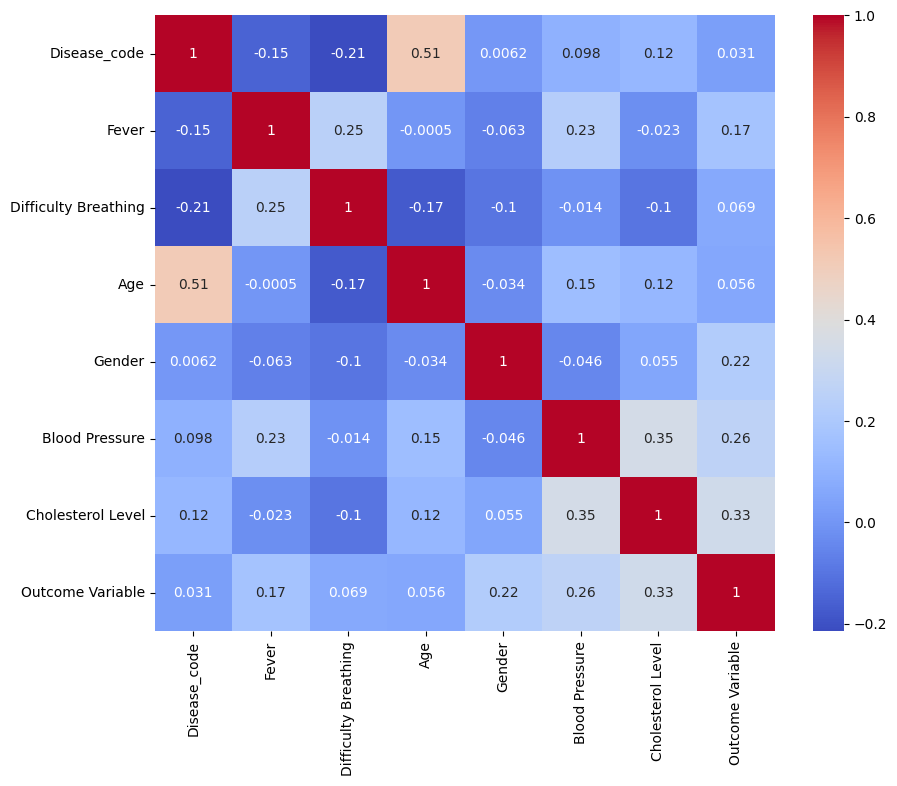

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

# Variables relacionadas
## Correlación moderada (0.3 a 0.7, o -0.3 a -0.7)
- Age (0.51)
## Correlación débil (0 a 0.3, o 0 a -0.3)
- Fever (- 0.15) x
- Difficulty breathing (-0.21) x
- Gender (0.0062)
- Blood pressure (0.098)
- Cholesterol level (0.12) x
- Outcome variable (0.031) 
## Otros
- Cholesterol Level y Blood Pressure (0.35) (moderada)
- Outcome Variable y Cholesterol Level (0.33) (moderada)

In [33]:
# Guardar data9 en un archivo CSV
data9.to_csv('Dataset_limpio.csv', index=False)

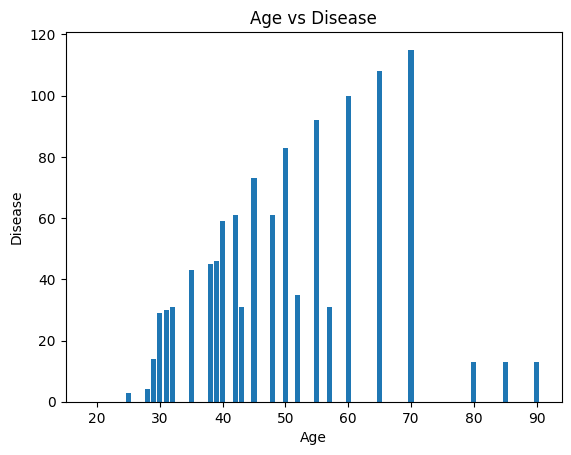

In [34]:
# Generar un gráfico de barras que relacione 'Age' con 'Disease'

ageC = data9['Age']
diseaseC = data9['Disease_code']

plt.bar(ageC, diseaseC)
plt.xlabel('Age')
plt.ylabel('Disease')
plt.title('Age vs Disease')
plt.show()

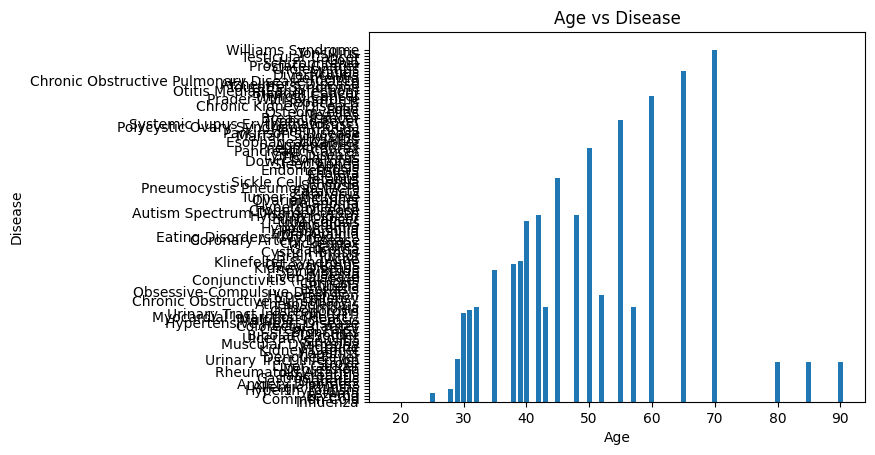

In [36]:
ageC = data7['Age']
diseaseC = data7['Disease']

plt.bar(ageC, diseaseC)
plt.xlabel('Age')
plt.ylabel('Disease')
plt.title('Age vs Disease')
plt.show()

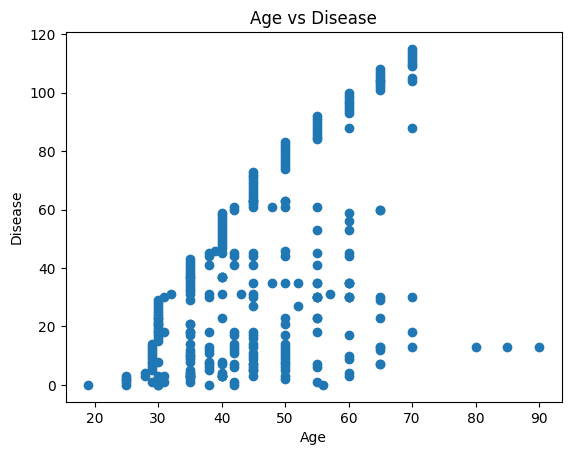

In [38]:
# Generar un gráfico de dispersión que relacione 'Age' con 'Disease'
ageC = data9['Age']
diseaseC = data9['Disease_code']

plt.scatter(ageC, diseaseC)
plt.xlabel('Age')
plt.ylabel('Disease')
plt.title('Age vs Disease')
plt.show()

El gráfico muestra que existe una relación entre la edad y el código de enfermedad. Algunos códigos de enfermedad son más frecuentes en ciertos rangos de edad. Por ejemplo, se puede observar que los puntos correspondientes al código de enfermedad "A" se concentran en el rango de edad de 20 a 50 años, con un mayor número de casos en el rango de 30 a 40 años. Esto significa que el código de enfermedad "A" es más frecuente en personas de 30 a 40 años.



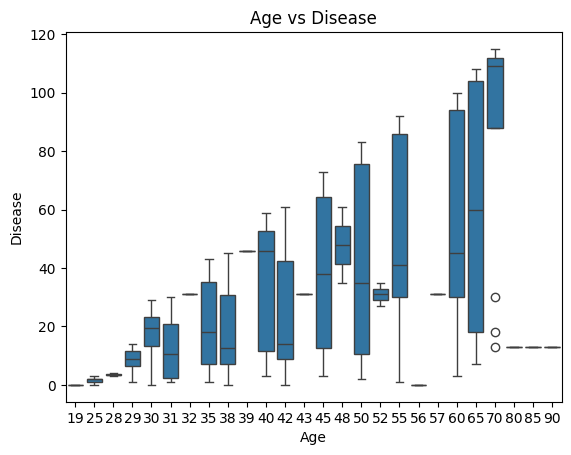

In [44]:
# Generar un diagrama de caja que relacione 'Age' con 'Disease'
ageC = data9['Age']
diseaseC = data9['Disease_code']

sns.boxplot(x=ageC, y=diseaseC)
plt.xlabel('Age')
plt.ylabel('Disease')
plt.title('Age vs Disease')
plt.show()

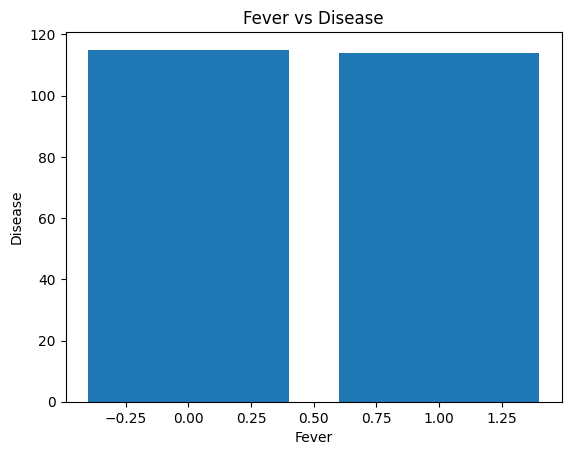

In [39]:
# Generar un gráfico de barras que relacione 'Fever' con 'Disease'
feverC = data9['Fever']
diseaseC = data9['Disease_code']

plt.bar(feverC, diseaseC)
plt.xlabel('Fever')
plt.ylabel('Disease')
plt.title('Fever vs Disease')
plt.show()

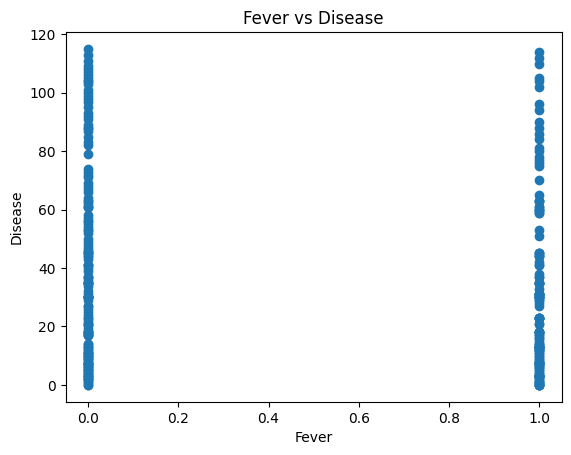

In [40]:
# Generar un gráfico de dispersión que relacione 'Fever' con 'Disease'
feverC = data9['Fever']
diseaseC = data9['Disease_code']

plt.scatter(feverC, diseaseC)
plt.xlabel('Fever')
plt.ylabel('Disease')
plt.title('Fever vs Disease')
plt.show()

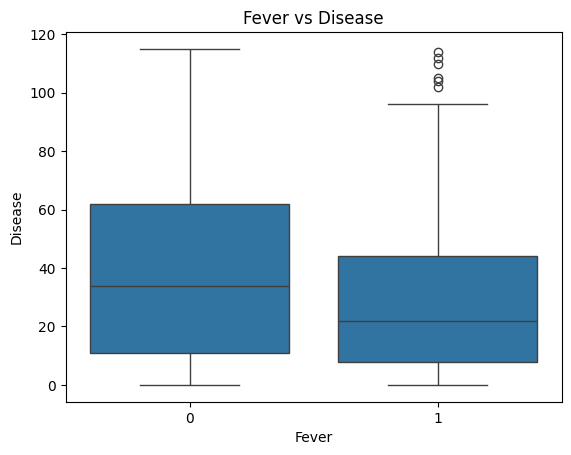

In [41]:
# Generar un diagrama de caja que relacione 'Fever' con 'Disease'
feverC = data9['Fever']
diseaseC = data9['Disease_code']

sns.boxplot(x=feverC, y=diseaseC)
plt.xlabel('Fever')
plt.ylabel('Disease')
plt.title('Fever vs Disease')
plt.show()

En general, el gráfico muestra que la mayoría de los códigos de enfermedad tienen una mayor proporción de casos con fiebre "No" que con fiebre "Sí". El gráfico permite observar la proporción de casos con fiebre "No" y "Sí" para cada código de enfermedad.

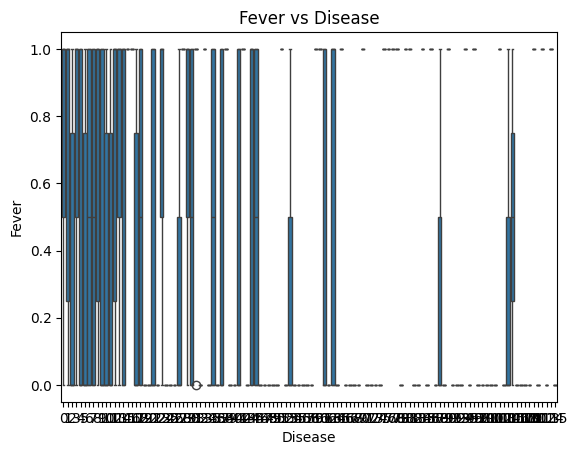

In [42]:
feverC = data9['Fever']
diseaseC = data9['Disease_code']

sns.boxplot(y=feverC, x=diseaseC)
plt.xlabel('Disease')
plt.ylabel('Fever')
plt.title('Fever vs Disease')
plt.show()

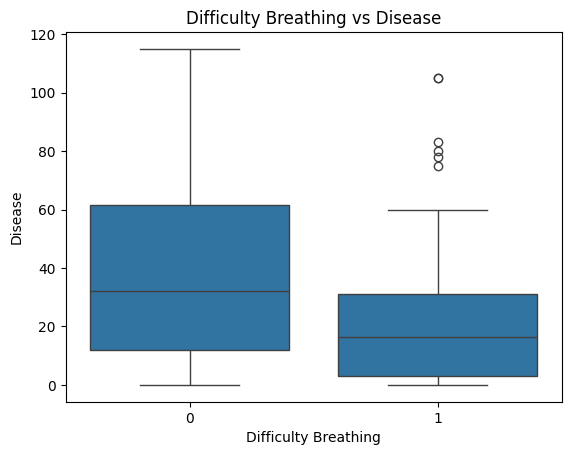

In [43]:
# Generar un diagrama de caja que relacione 'Difficulty Breathing' con 'Disease'
dBreathingC = data9['Difficulty Breathing']
diseaseC = data9['Disease_code']

sns.boxplot(x=dBreathingC, y=diseaseC)
plt.xlabel('Difficulty Breathing')
plt.ylabel('Disease')
plt.title('Difficulty Breathing vs Disease')
plt.show()

En general, el gráfico muestra que la mayoría de los códigos de enfermedad tienen una mayor proporción de casos con dificultad para respirar "No" que con dificultad para respirar "Sí". La altura de cada barra apilada representa la proporción total de casos para ese código de enfermedad. La altura de la barra azul dentro de la barra apilada representa la proporción de casos con dificultad para respirar "No" para ese código de enfermedad. La altura de la barra naranja dentro de la barra apilada representa la proporción de casos con dificultad para respirar "Sí" para ese código de enfermedad.

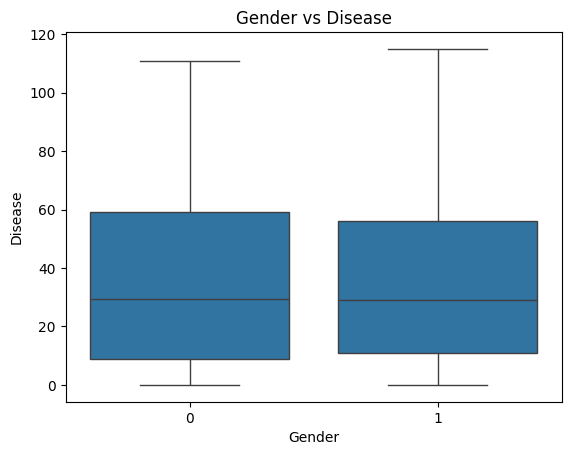

In [46]:
# Generar un diagrama de caja que relacione 'Gender' con 'Disease'
genderC = data9['Gender']
diseaseC = data9['Disease_code']

sns.boxplot(x=genderC, y=diseaseC)
plt.xlabel('Gender')
plt.ylabel('Disease')
plt.title('Gender vs Disease')
plt.show()

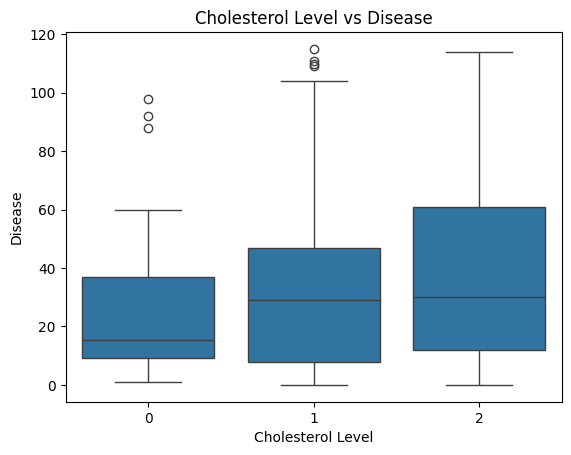

In [47]:
# Generar un diagrama de caja que relacione 'Cholesterol Level' con 'Disease'
cLevelC = data9['Cholesterol Level']
diseaseC = data9['Disease_code']

sns.boxplot(x=cLevelC, y=diseaseC)
plt.xlabel('Cholesterol Level')
plt.ylabel('Disease')
plt.title('Cholesterol Level vs Disease')
plt.show()

El gráfico permite observar la proporción de casos con cada combinación de nivel de colesterol y código de enfermedad. La altura de cada barra representa la proporción de casos con la combinación de nivel de colesterol y código de enfermedad dados. Las barras más altas indican una mayor proporción de casos, mientras que las barras más bajas indican una menor proporción de casos.

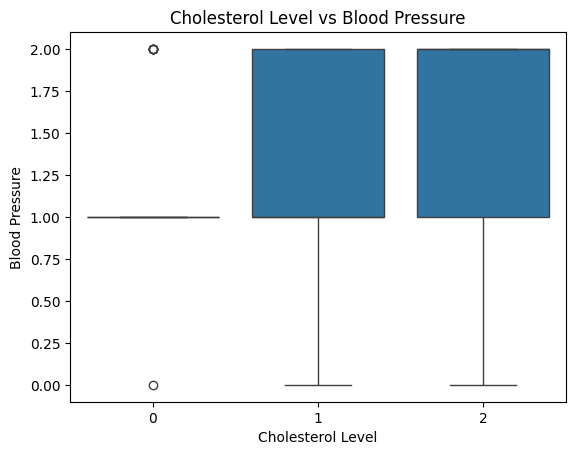

In [48]:
# Generar un diagrama de caja que relacione 'Cholesterol Level' con 'Blood Presure'
cLevelC = data9['Cholesterol Level']
bloodP = data9['Blood Pressure']

sns.boxplot(x=cLevelC, y=bloodP)
plt.xlabel('Cholesterol Level')
plt.ylabel('Blood Pressure')
plt.title('Cholesterol Level vs Blood Pressure')
plt.show()

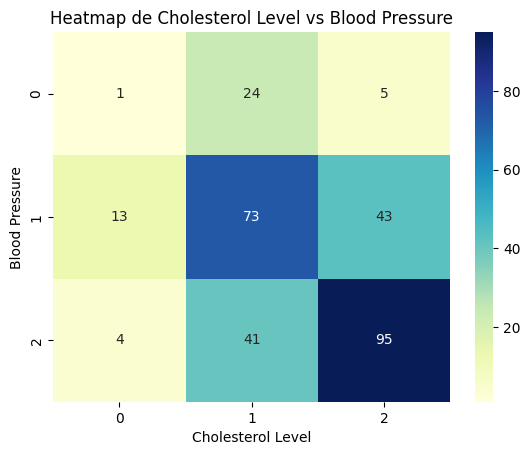

In [49]:
# Generar un mapa de calor que relacione 'Cholesterol Level' con 'Blood Presure'
# Crear una tabla de contingencia
contingency_table = pd.crosstab(data9['Cholesterol Level'], data9['Blood Pressure'])

# Generar un heatmap
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.xlabel('Cholesterol Level')
plt.ylabel('Blood Pressure')
plt.title('Heatmap de Cholesterol Level vs Blood Pressure')
plt.show()

El gráfico muestra que existe una relación positiva general entre la presión arterial y el nivel de colesterol. Por ejemplo, se puede observar que la combinación de presión arterial alta y nivel de colesterol alto (cuadrante superior derecho del mapa de calor) se asocia con la relación positiva más fuerte. Sin embargo, la intensidad de la relación varía según la combinación de presión arterial y nivel de colesterol. Las combinaciones de presión arterial alta y nivel de colesterol alto se asocian con la relación positiva más fuerte, mientras que las combinaciones de presión arterial baja y nivel de colesterol bajo se asocian con una relación neutral. 

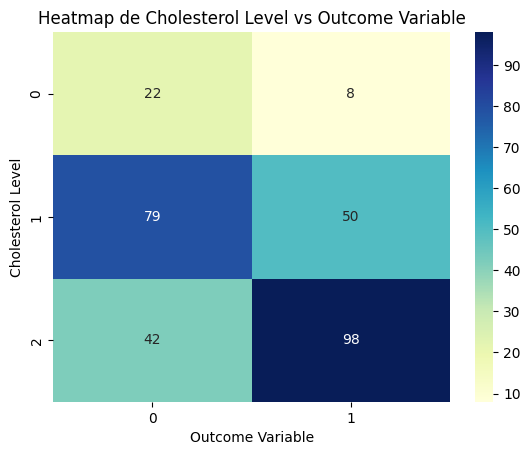

In [51]:
# Generar un mapa de calor que relacione 'Cholesterol Level' con 'Blood Presure'
# Crear una tabla de contingencia
contingency_table = pd.crosstab(data9['Cholesterol Level'], data9['Outcome Variable'])

# Generar un heatmap
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.xlabel('Outcome Variable')
plt.ylabel('Cholesterol Level')
plt.title('Heatmap de Cholesterol Level vs Outcome Variable')
plt.show()

El modelo tiene una precisión general del 79.2%. Esto significa que el modelo realizó correctamente el 79.2% de las predicciones. Sin embargo, es importante analizar el rendimiento del modelo en cada categoría (positivo y negativo) por separado. En este caso, el modelo tiene una precisión del 80% para los casos positivos y del 78.4% para los casos negativos.

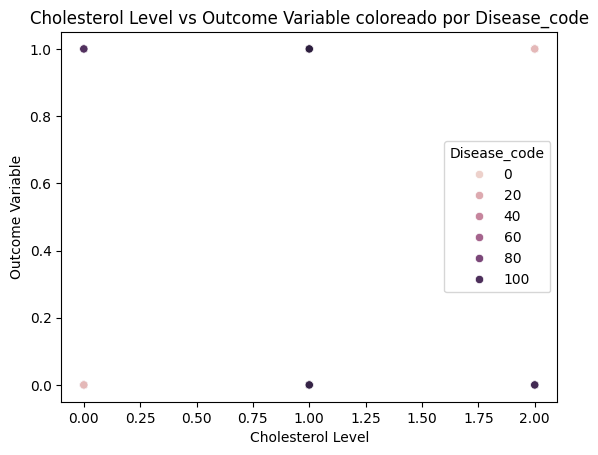

In [53]:
# Generar un scatterplot que relacione 'Cholesterol Level' con 'Outcome Variable', coloreado por 'Disease_code'
sns.scatterplot(x=data9['Cholesterol Level'], y=data9['Outcome Variable'], hue=data9['Disease_code'])

plt.xlabel('Cholesterol Level')
plt.ylabel('Outcome Variable')
plt.title('Cholesterol Level vs Outcome Variable coloreado por Disease_code')
plt.show()

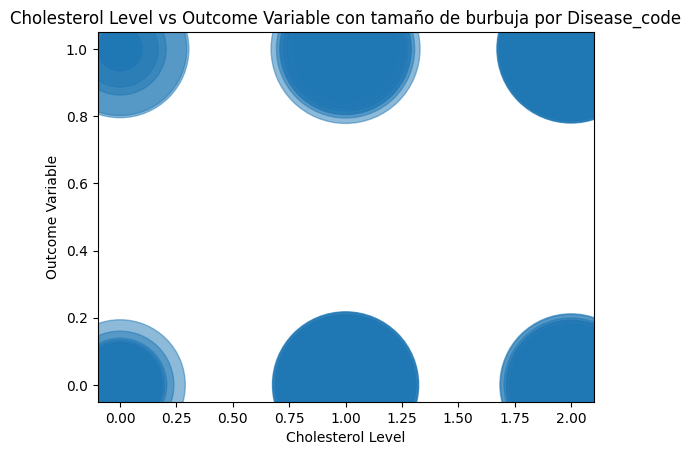

In [54]:
import matplotlib.pyplot as plt

# Generar un gráfico de burbujas que relacione 'Cholesterol Level' con 'Outcome Variable', con el tamaño de las burbujas determinado por 'Disease_code'
bubble_size = data9['Disease_code'] * 100  # Ajustar el tamaño de las burbujas
plt.scatter(x=data9['Cholesterol Level'], y=data9['Outcome Variable'], s=bubble_size, alpha=0.5)

plt.xlabel('Cholesterol Level')
plt.ylabel('Outcome Variable')
plt.title('Cholesterol Level vs Outcome Variable con tamaño de burbuja por Disease_code')
plt.show()

El gráfico muestra que existe una relación positiva entre el nivel de colesterol y la variable de resultado. Esto significa que a medida que el nivel de colesterol aumenta, también lo hace la probabilidad de un resultado positivo. Además, el tamaño de la burbuja por código de enfermedad permite observar la relación entre el nivel de colesterol y la variable de resultado para cada enfermedad específica. Las enfermedades con burbujas más grandes tienen una mayor asociación entre el nivel de colesterol y la variable de resultado, mientras que las enfermedades con burbujas más pequeñas tienen una menor asociación.